# Liver disease prediction

dataset source: UCI ML Repository
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

**Information**

Data Set Information:

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".


Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

attribute 11:
1. patient
2. not patient

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# import models
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# Explorative Data Analysis

In [2]:
data_path = 'indian_liver_patient.csv'
data = pd.read_csv(data_path)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


'Albumin_and_Globulin_Ratio' column has 4 missing values as Non-Null is 579.

In [4]:
data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [5]:
data.describe(include='all').loc['mean']

Age                            44.746141
Gender                               NaN
Total_Bilirubin                 3.298799
Direct_Bilirubin                1.486106
Alkaline_Phosphotase          290.576329
Alamine_Aminotransferase       80.713551
Aspartate_Aminotransferase    109.910806
Total_Protiens                   6.48319
Albumin                         3.141852
Albumin_and_Globulin_Ratio      0.947064
Dataset                         1.286449
Name: mean, dtype: object

The mean values fluctuates quite a lot, highest and lowest values are  
'Alkaline_Phosphotase' = 290.576329 and  
Albumin_and_Globulin_Ratio = 0.947064  
The data needs be  normalized.

In [6]:
# change the column name 'Dataset' to 'Outcome'
data.rename(columns={'Dataset':'Outcome'},inplace=True)
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Outcome'],
      dtype='object')

In [7]:
data.Outcome

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Outcome, Length: 583, dtype: int64

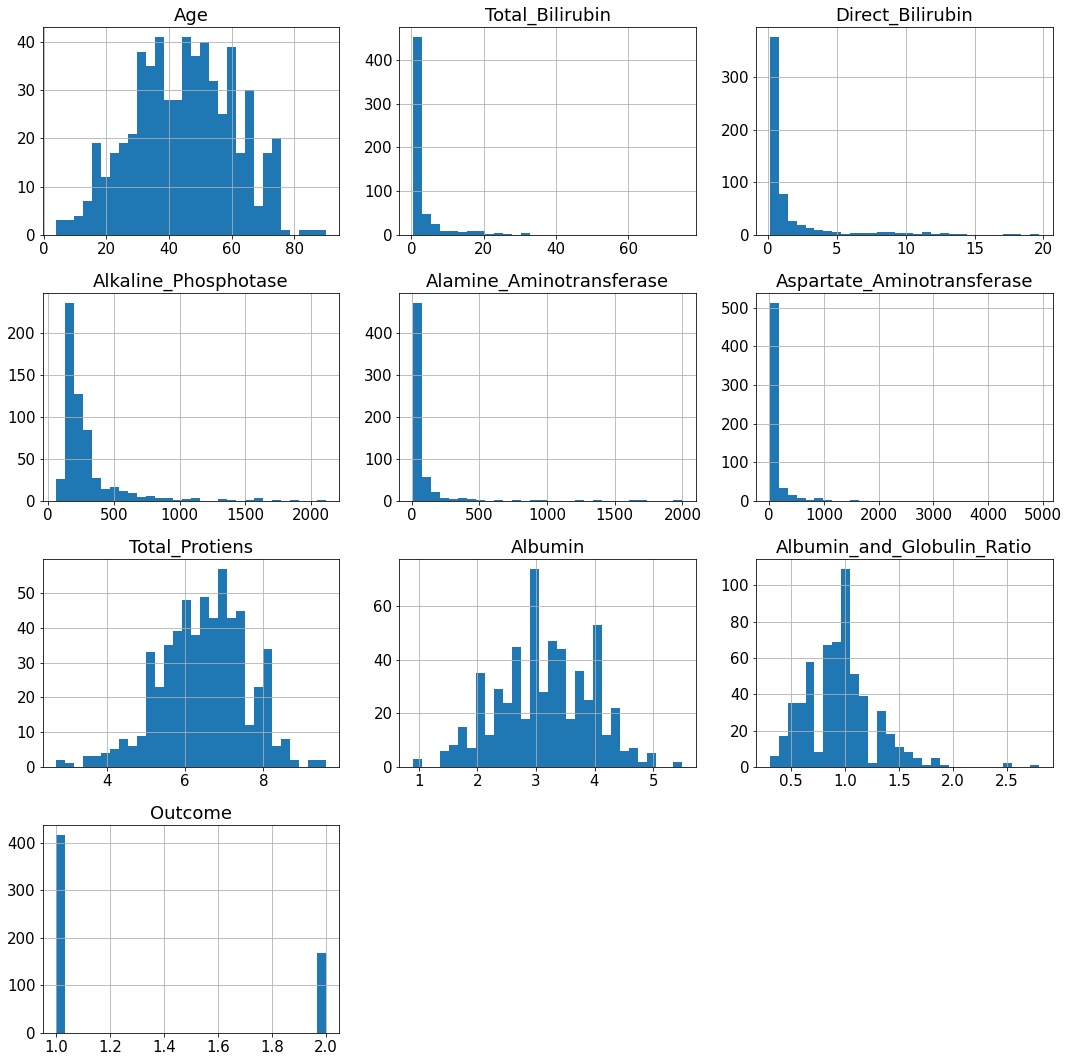

In [10]:
data.hist(bins=30,figsize=[15,15])

plt.rc('font',size=15)
plt.tight_layout()
plt.savefig("images/hist.png",facecolor='white', transparent=False)

From the range of values it is quite clear that data needs normalization.

## Feature correlations

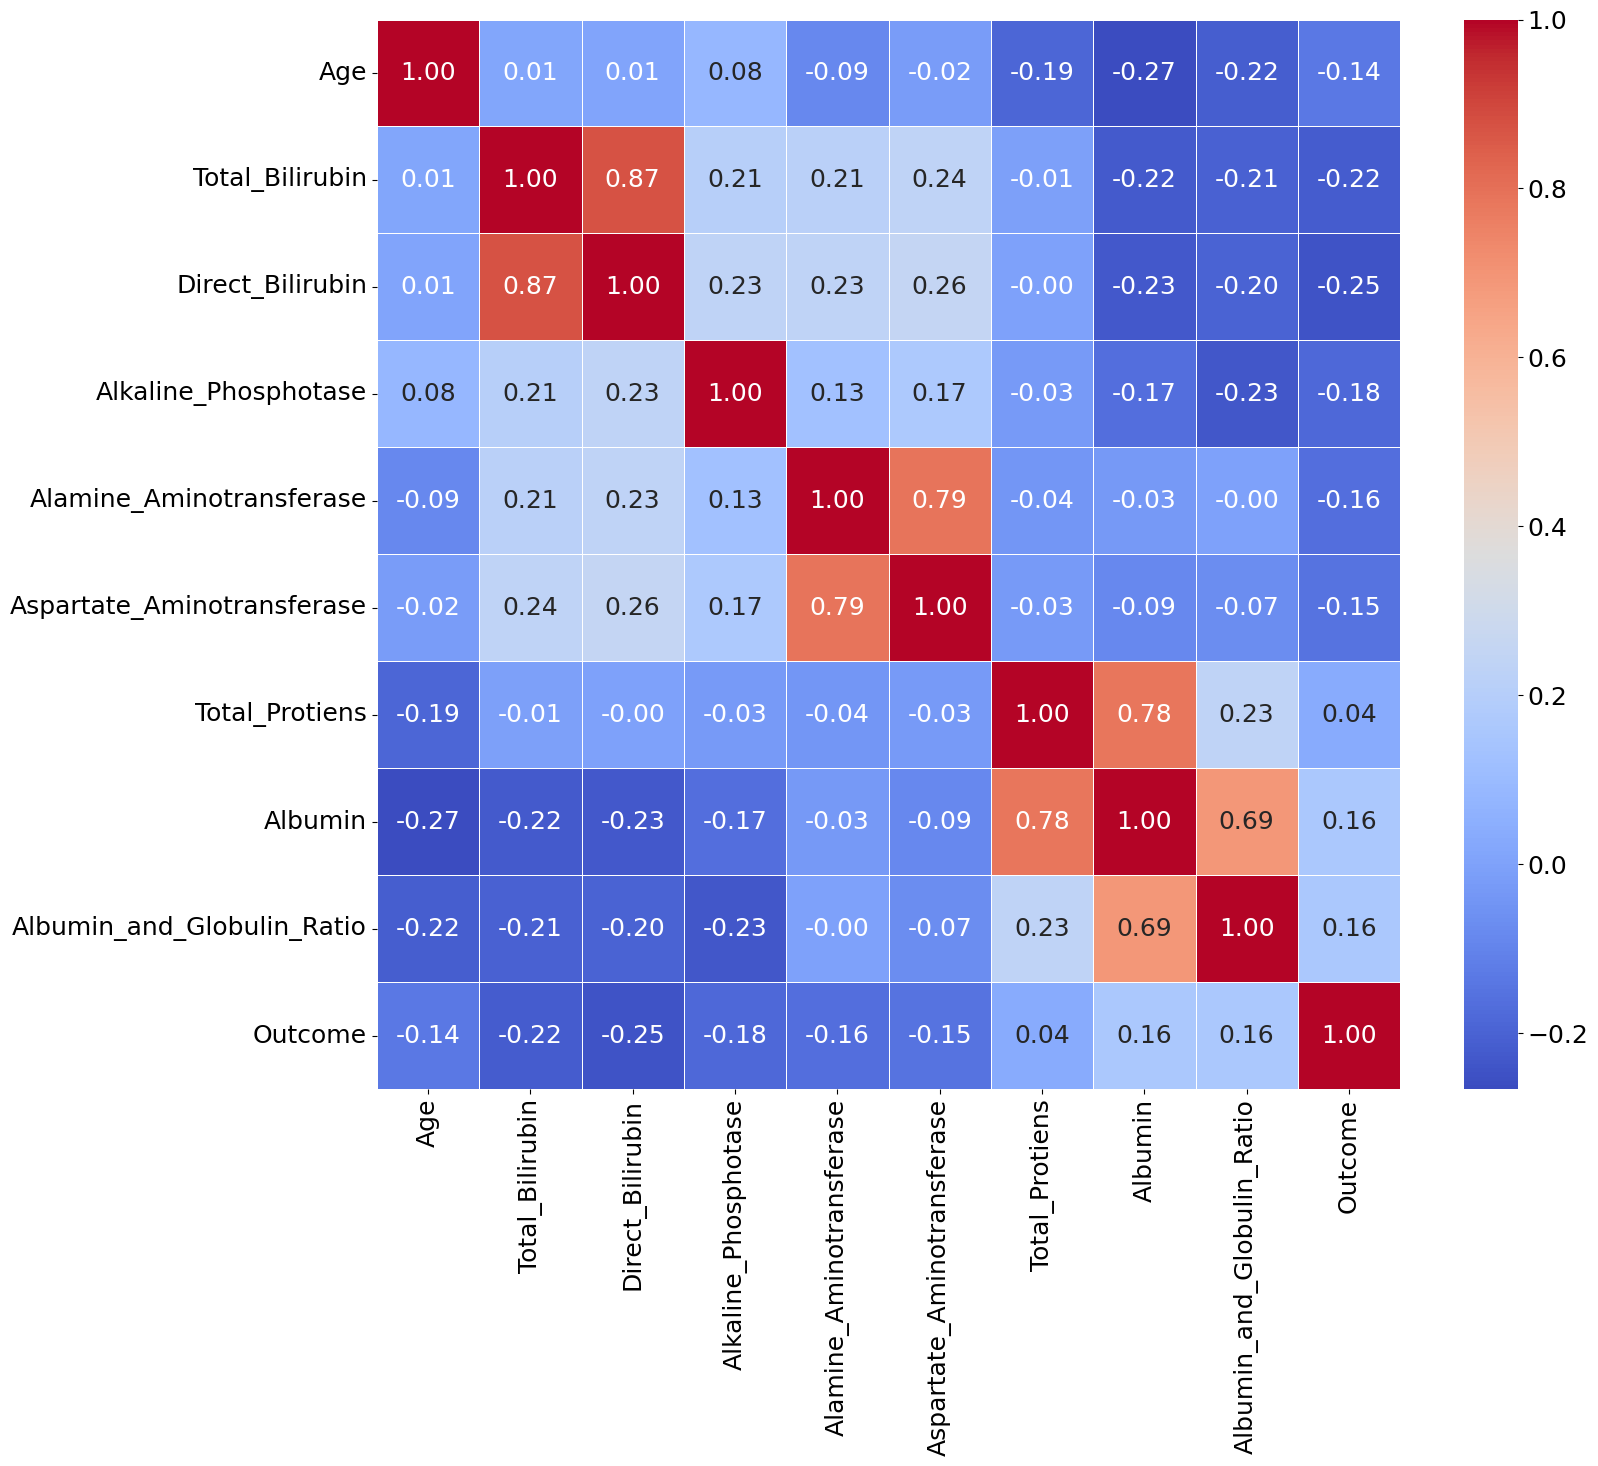

In [25]:
# plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=[17,15])
sns.heatmap(data= data.corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":18},fmt='0.2f')

plt.rc('font',size=18)

plt.tight_layout()
plt.savefig("images/corr1.png",facecolor='white', transparent=False)

1. correlation between Total_Bilirubin and Direct_Bilirubin is high: 0.9. One of them can be removed.
2. correlation between Alamine_Aminotransferase and Aspartate_Aminotransferase is high: 0.8.
3. correlation between Total_Protiens and Albumin is high: 0.8.

features to be dropped = Direct_Bilirubin,Aspartate_Aminotransferase,Albumin


In [26]:
features_to_drop = ['Direct_Bilirubin','Aspartate_Aminotransferase','Albumin']


In [27]:
data2 = data.copy()
data2.drop(features_to_drop,axis=1,inplace=True)
data2.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Outcome'],
      dtype='object')

<AxesSubplot:>

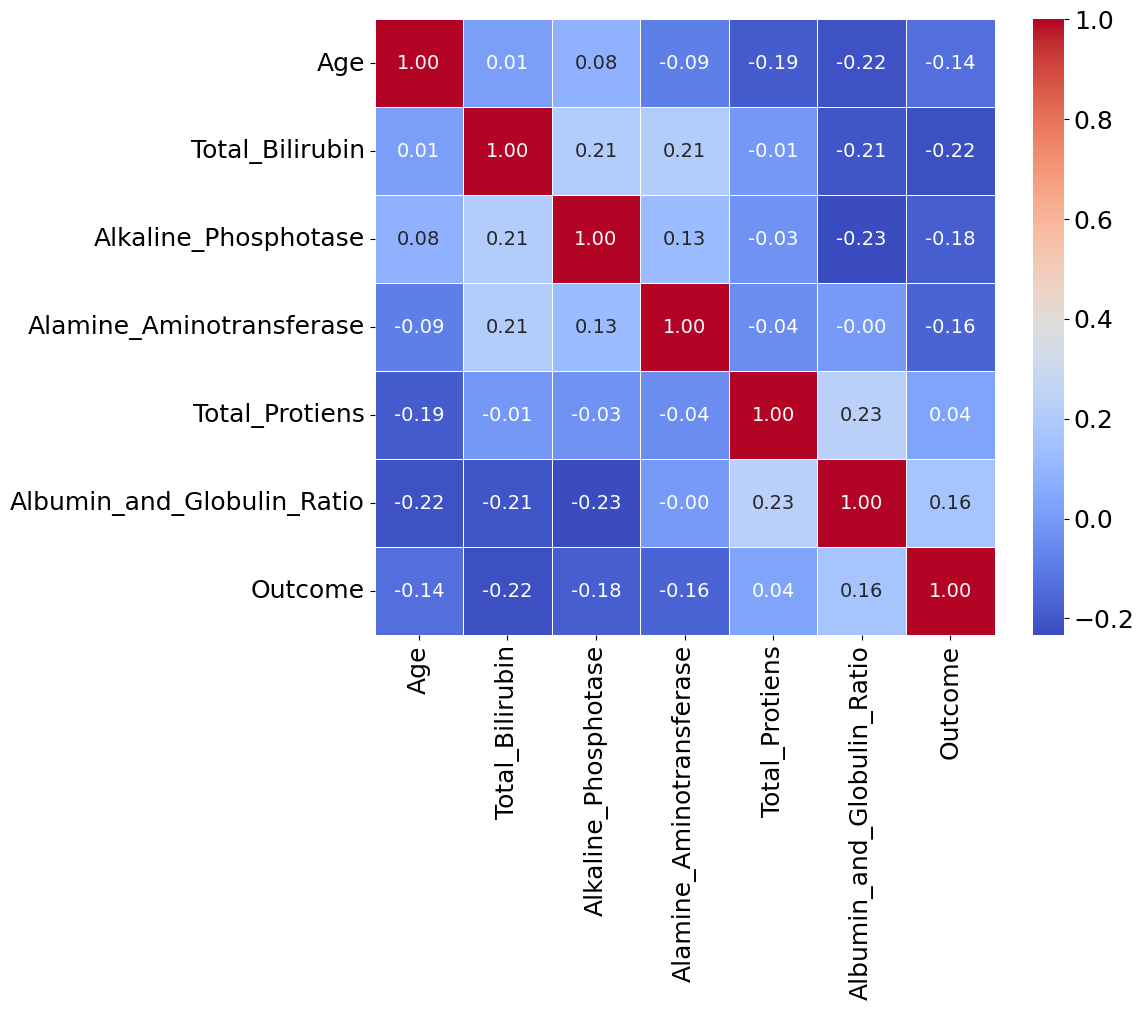

In [28]:
plt.figure(figsize=[10,8])
sns.heatmap(data= data2.corr(),annot=True,linewidths=0.5,cmap='coolwarm',
            annot_kws={"fontsize":14},fmt='0.2f')

no correlations present between features

## Fill the missing data

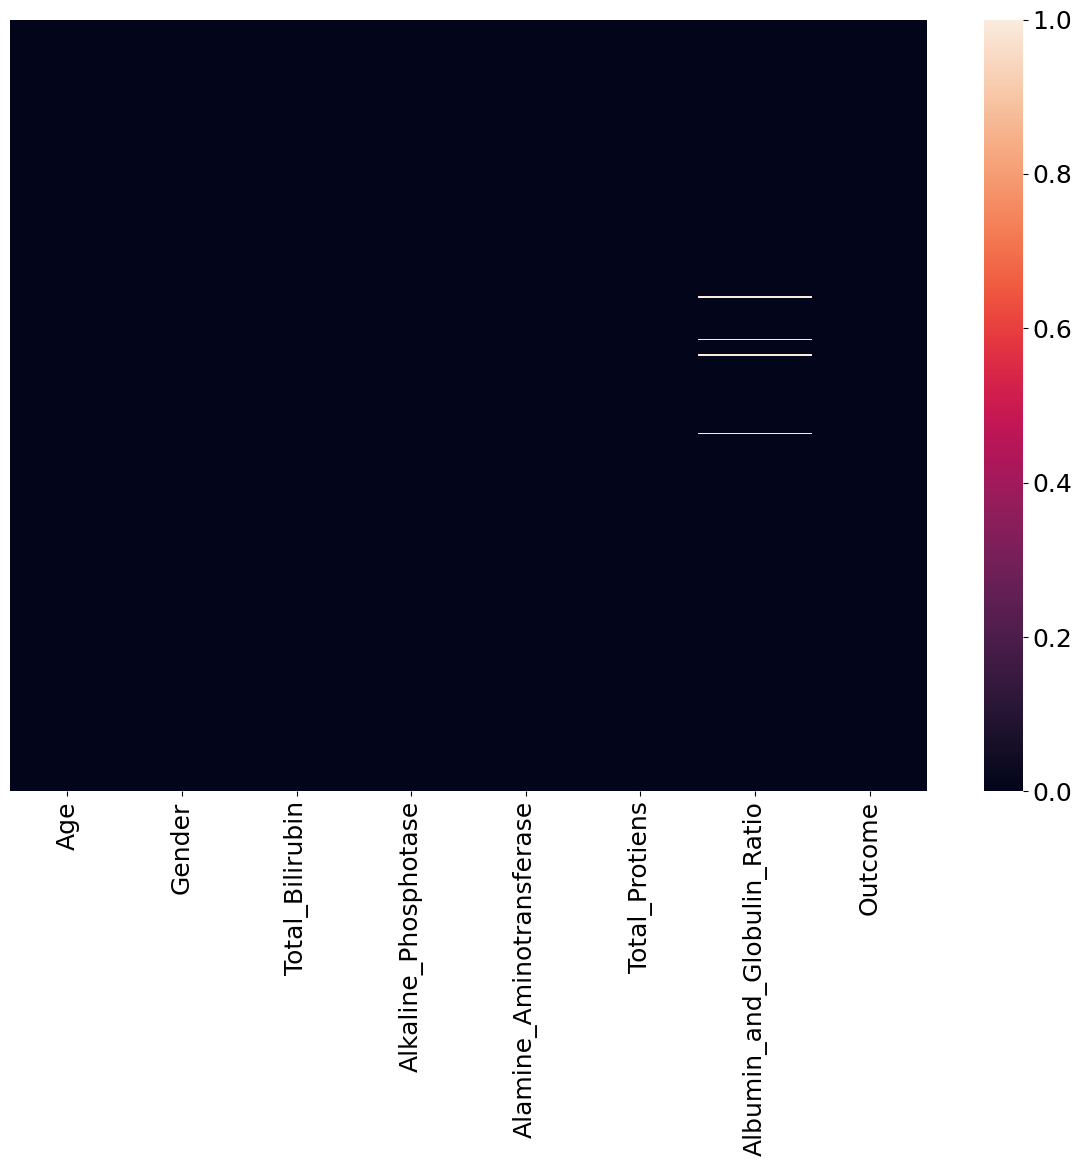

In [31]:
# plt.rcParams.update(plt.rcParamsDefault)

figure = plt.figure(figsize=(12,12))
sns.heatmap(data2.isnull(),yticklabels=False)

plt.tight_layout()
plt.savefig("images/missing_heatmap.png",facecolor='white', transparent=False)

Fill the missing Albumin_and_Globulin_Ratio with mean values.

In [33]:
data2.loc[data2['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Outcome
209,45,Female,0.9,189,23,6.6,NaN,1
241,51,Male,0.8,230,24,6.5,NaN,1
253,35,Female,0.6,180,12,5.2,NaN,2
312,27,Male,1.3,106,25,8.5,NaN,2


In [34]:
# groupby Gender
data2[['Albumin_and_Globulin_Ratio','Gender']].groupby('Gender').mean()

,Albumin_and_Globulin_Ratio
Gender,
Female,0.949000
Male,0.946446


In [35]:
# groupby Outcome
mean_ratio = data2[['Albumin_and_Globulin_Ratio','Outcome']].groupby('Outcome').mean()
mean_ratio = mean_ratio['Albumin_and_Globulin_Ratio'].to_dict()
mean_ratio

{1: 0.9141787439613527, 2: 1.0295757575757576}

Mean values based on Gender are almost same. However, meanvalues by outcome is slight different. Hence the missing values will be filled based on Outcome.

In [36]:
mean_ratio[1]

0.9141787439613527

In [37]:
data2.loc[(data2['Albumin_and_Globulin_Ratio'].isnull()) &
          (data2['Outcome']==1),'Albumin_and_Globulin_Ratio'] = mean_ratio[1]
data2.loc[(data2['Albumin_and_Globulin_Ratio'].isnull()) 
          & (data2['Outcome']==2),'Albumin_and_Globulin_Ratio'] = mean_ratio[2]

<AxesSubplot:>

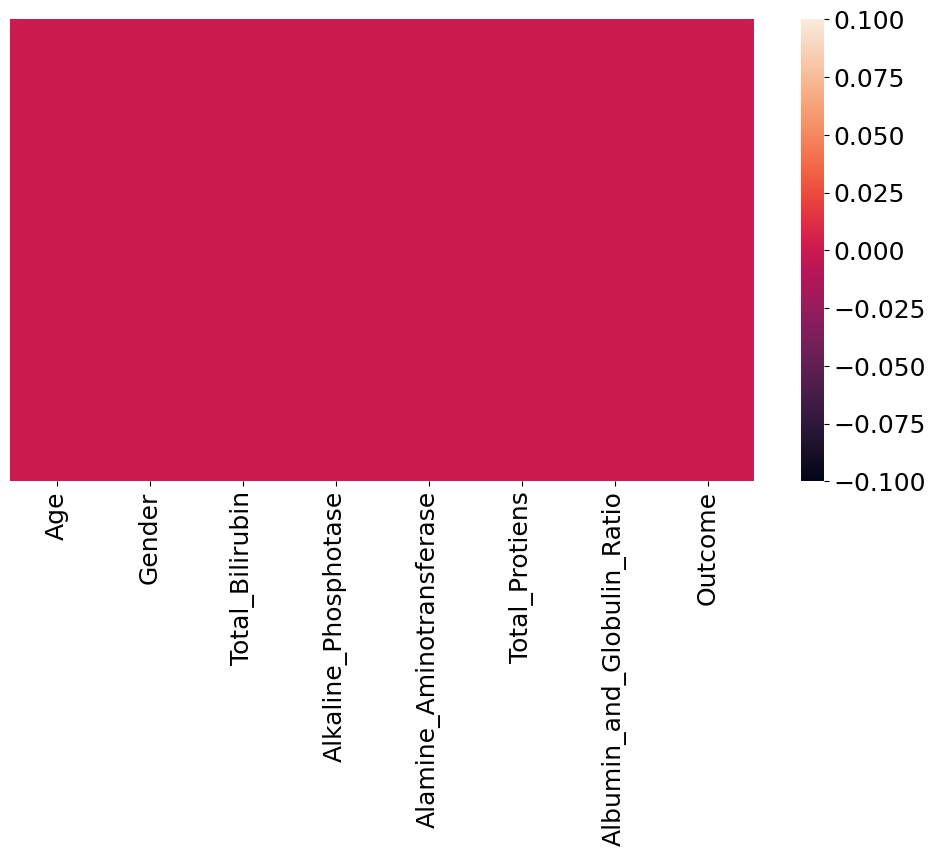

In [38]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(data2.isnull(),yticklabels=False)

In [39]:
# make Gender values 0 and 1
data2['Gender'] = np.where(data2['Gender']=='Female',0,1)
data2['Gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64

In [40]:
# change the output to int not float, without this LogisticRegression: Unknown label type: 'continuous' error will come.
data2['Outcome']=data2['Outcome'].astype('int')
data2['Outcome'].value_counts()

1    416
2    167
Name: Outcome, dtype: int64

# Model performance

In [41]:
y = data2['Outcome']
x = data2.drop('Outcome',axis=1)
print(x.head(5),'\n\n')
print(y)

   Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7                   187   
1   62       1             10.9                   699   
2   62       1              7.3                   490   
3   58       1              1.0                   182   
4   72       1              3.9                   195   

   Alamine_Aminotransferase  Total_Protiens  Albumin_and_Globulin_Ratio  
0                        16             6.8                        0.90  
1                        64             7.5                        0.74  
2                        60             7.0                        0.89  
3                        14             6.8                        1.00  
4                        27             7.3                        0.40   


0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Outcome, Length: 583, dtype: int64


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1234,
                                                 test_size=0.3)

In [43]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(408, 7) (175, 7) (408,) (175,)


## models

In [44]:
models = []
random_state = 1234
models.append(('LR', LogisticRegression(random_state = random_state,
                                        solver='liblinear',max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = random_state)))
models.append(('RF', RandomForestClassifier(random_state = random_state)))
models.append(('SVM', SVC(gamma='auto', random_state = random_state)))
models.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
models.append(("LightGBM", LGBMClassifier(random_state = random_state)))
models

[('LR',
  LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=1234)),
 ('RF', RandomForestClassifier(random_state=1234)),
 ('SVM', SVC(gamma='auto', random_state=1234)),
 ('XGB', GradientBoostingClassifier(random_state=1234)),
 ('LightGBM', LGBMClassifier(random_state=1234))]

In [45]:
results = []
names   = []

for name, model in models:
    print("name :",name)
    print("model :",model)       
    cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')
[0.71186441 0.69491525 0.74576271 0.75862069 0.68965517 0.74137931
 0.74137931 0.68965517 0.74137931 0.75862069] 

LR: 0.727323 (0.026493)
name : KNN
model : KNeighborsClassifier()
[0.76271186 0.69491525 0.69491525 0.68965517 0.68965517 0.67241379
 0.5862069  0.53448276 0.72413793 0.68965517] 

KNN: 0.673875 (0.062585)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.69491525 0.59322034 0.74576271 0.68965517 0.51724138 0.67241379
 0.67241379 0.44827586 0.70689655 0.72413793] 

CART: 0.646493 (0.091606)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.71186441 0.62711864 0.6779661  0.75862069 0.70689655 0.68965517
 0.65517241 0.51724138 0.68965517 0.74137931] 

RF: 0.677557 (0.064592)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.71186441 0.71186441 0.71186441 0.70689655 0.72413793 0.72413793
 0.68965517 0.70689655 0.70689655 0.70689655] 

SVM: 0.710111 (0

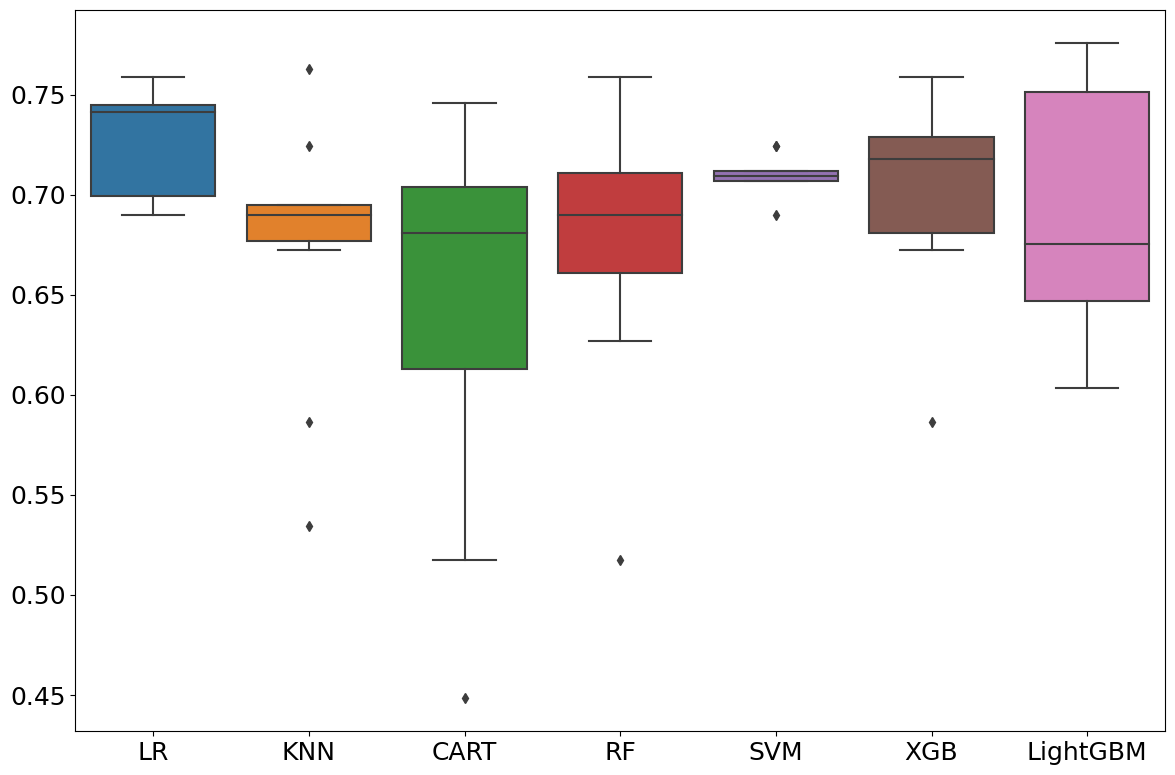

In [46]:
results_df = pd.DataFrame(np.array(results).transpose(),columns=names)
plt.figure(figsize=[12,8])
sns.boxplot(data=results_df)

plt.rc('font',size=15)
plt.tight_layout()
plt.savefig("images/model_before_scaling.png",facecolor='white', transparent=False)

## scaled models

Scale the data to check model performance.

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
scaler = RobustScaler()
xs = scaler.fit_transform(x)
xs = pd.DataFrame(xs,columns=x.columns)
xs.head(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,0.80,-1.0,-0.166667,-0.171429,-0.506667,0.142857,-0.075
1,0.68,0.0,5.500000,4.008163,0.773333,0.642857,-0.475
2,0.68,0.0,3.500000,2.302041,0.666667,0.285714,-0.100
3,0.52,0.0,0.000000,-0.212245,-0.560000,0.142857,0.175
4,1.08,0.0,1.611111,-0.106122,-0.213333,0.500000,-1.325


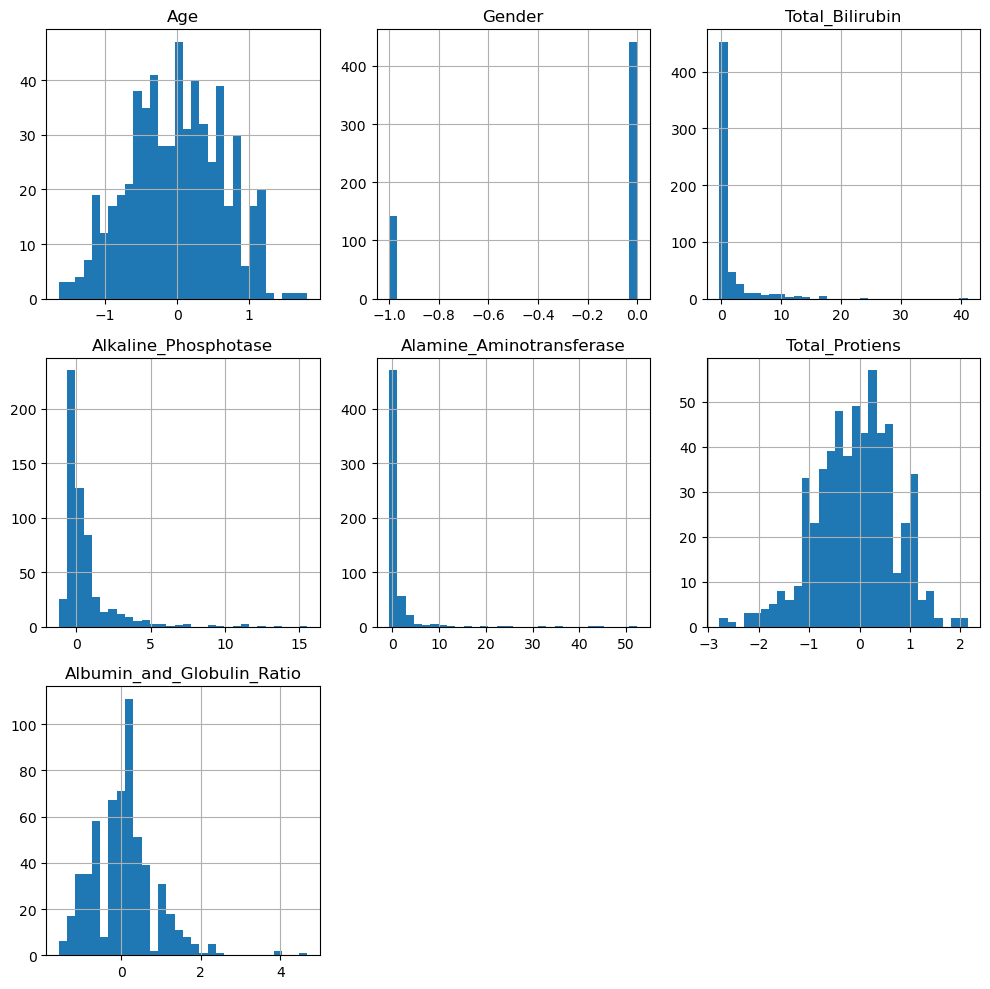

In [54]:
plt.rcParams.update(plt.rcParamsDefault)
xs.hist(bins=30,figsize=[10,10])

plt.tight_layout()
# plt.savefig()
plt.savefig("images/scaled_hist.png",facecolor='white', transparent=False)

In [55]:
def create_model_list():
    list_name = []
    random_state = 1234
    list_name.append(('LR', LogisticRegression(random_state = random_state,solver='liblinear',max_iter=500)))
    list_name.append(('KNN', KNeighborsClassifier()))
    list_name.append(('CART', DecisionTreeClassifier(random_state = random_state)))
    list_name.append(('RF', RandomForestClassifier(random_state = random_state)))
    list_name.append(('SVM', SVC(gamma='auto', random_state = random_state)))
    list_name.append(('XGB', GradientBoostingClassifier(random_state = random_state)))
    list_name.append(("LightGBM", LGBMClassifier(random_state = random_state)))
    return list_name

In [56]:
scaled_models = create_model_list()

In [57]:
scaled_results = []
scaled_names   = []

for name, model in scaled_models:
    print("name :",name)
    print("model :",model)       
    cv_results = cross_val_score(model, xs, y, cv = 10, scoring= "accuracy")
    print(cv_results,"\n")
    scaled_results.append(cv_results)
    scaled_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

name : LR
model : LogisticRegression(max_iter=500, random_state=1234, solver='liblinear')
[0.71186441 0.71186441 0.74576271 0.70689655 0.70689655 0.74137931
 0.74137931 0.70689655 0.74137931 0.75862069] 

LR: 0.727294 (0.019084)
name : KNN
model : KNeighborsClassifier()
[0.71186441 0.6440678  0.71186441 0.72413793 0.74137931 0.65517241
 0.63793103 0.63793103 0.63793103 0.72413793] 

KNN: 0.682642 (0.041038)
name : CART
model : DecisionTreeClassifier(random_state=1234)
[0.71186441 0.61016949 0.74576271 0.70689655 0.51724138 0.67241379
 0.67241379 0.46551724 0.70689655 0.72413793] 

CART: 0.653331 (0.088942)
name : RF
model : RandomForestClassifier(random_state=1234)
[0.69491525 0.66101695 0.6779661  0.75862069 0.70689655 0.68965517
 0.65517241 0.53448276 0.68965517 0.75862069] 

RF: 0.682700 (0.059647)
name : SVM
model : SVC(gamma='auto', random_state=1234)
[0.71186441 0.69491525 0.71186441 0.72413793 0.72413793 0.72413793
 0.70689655 0.70689655 0.70689655 0.70689655] 

SVM: 0.711864 (0

In [58]:
scaled_results_df = pd.DataFrame(np.array(scaled_results).transpose(),columns=scaled_names)

<AxesSubplot:>

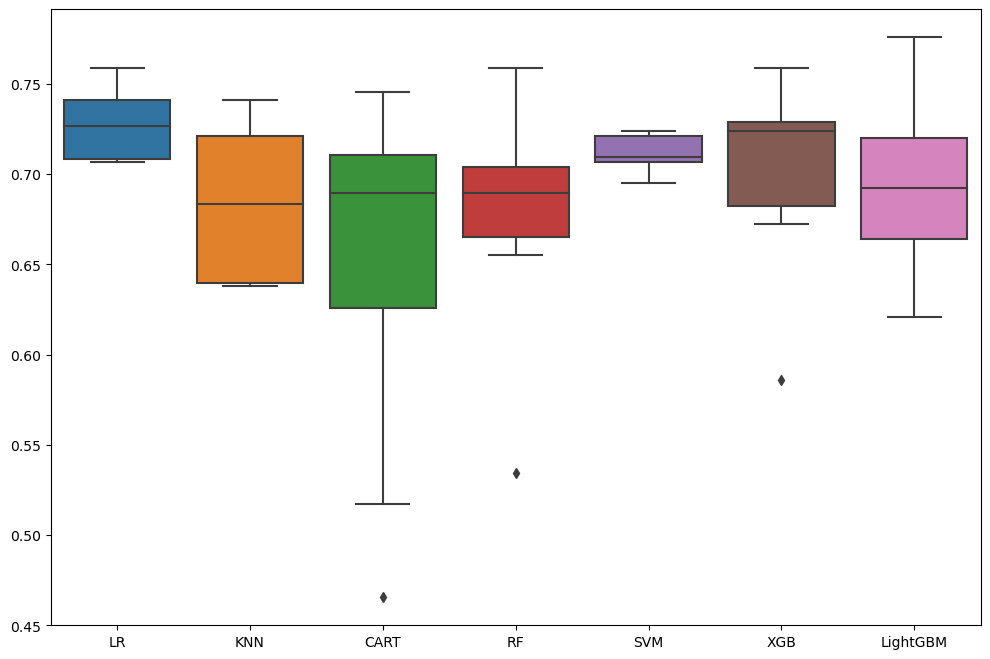

In [59]:
plt.figure(figsize=[12,8])
sns.boxplot(data=scaled_results_df)

## comparison of models before and after scaling data

In [60]:
print('results before scaling : \n',results_df.head(5))
print('results after scaling  : \n',scaled_results_df.head(5))

results before scaling : 
          LR       KNN      CART        RF       SVM       XGB  LightGBM
0  0.711864  0.762712  0.694915  0.711864  0.711864  0.711864  0.661017
1  0.694915  0.694915  0.593220  0.627119  0.711864  0.728814  0.728814
2  0.745763  0.694915  0.745763  0.677966  0.711864  0.728814  0.644068
3  0.758621  0.689655  0.689655  0.758621  0.706897  0.758621  0.758621
4  0.689655  0.689655  0.517241  0.706897  0.724138  0.706897  0.689655
results after scaling  : 
          LR       KNN      CART        RF       SVM       XGB  LightGBM
0  0.711864  0.711864  0.711864  0.694915  0.711864  0.711864  0.661017
1  0.711864  0.644068  0.610169  0.661017  0.694915  0.728814  0.694915
2  0.745763  0.711864  0.745763  0.677966  0.711864  0.728814  0.644068
3  0.706897  0.724138  0.706897  0.758621  0.724138  0.758621  0.775862
4  0.706897  0.741379  0.517241  0.706897  0.724138  0.724138  0.706897


In [61]:
results_df_melt = pd.melt(results_df)
results_df_melt['scaled']='NO'
results_df_melt.head(3)

,variable,value,scaled
0,LR,0.711864,NO
1,LR,0.694915,NO
2,LR,0.745763,NO


In [62]:
scaled_results_df_melt = pd.melt(scaled_results_df)
scaled_results_df_melt['scaled']='Yes'
scaled_results_df_melt.head(3)

,variable,value,scaled
0,LR,0.711864,Yes
1,LR,0.711864,Yes
2,LR,0.745763,Yes


In [63]:
combined_results_df = pd.concat([results_df_melt,scaled_results_df_melt])
combined_results_df.head(5)

,variable,value,scaled
0,LR,0.711864,NO
1,LR,0.694915,NO
2,LR,0.745763,NO
3,LR,0.758621,NO
4,LR,0.689655,NO


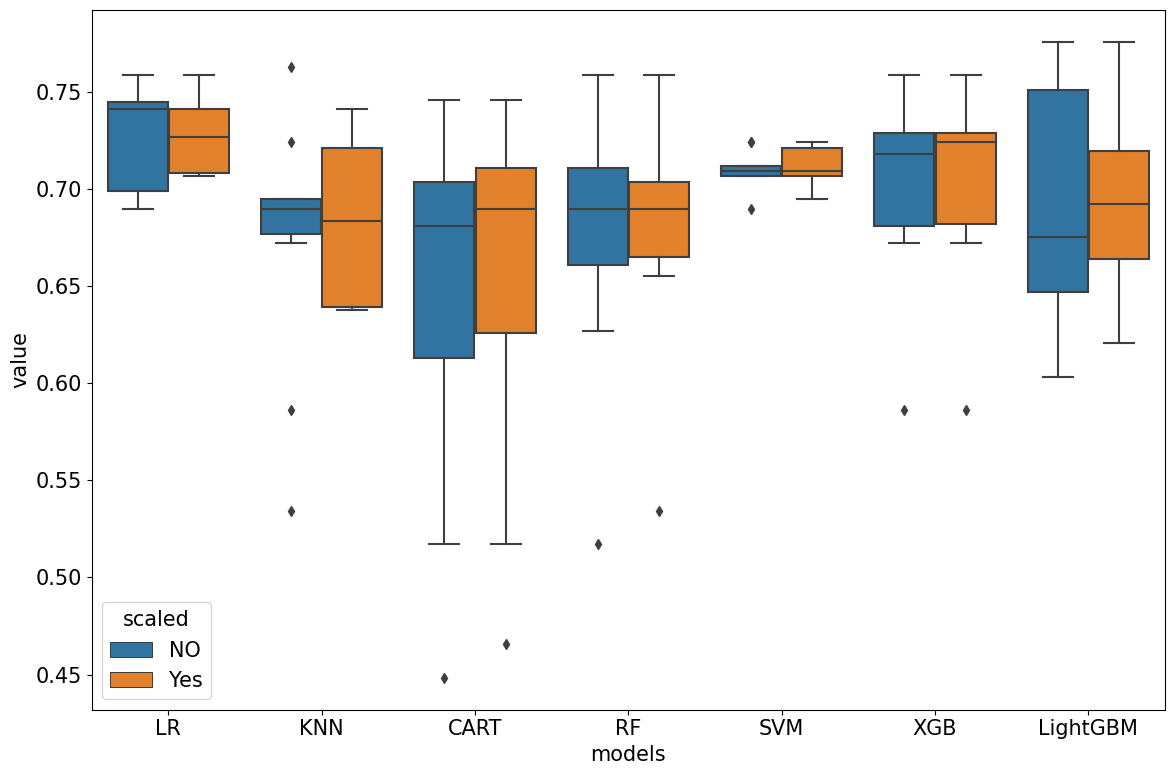

In [67]:
plt.figure(figsize=[12,8])
sns.boxplot(data=combined_results_df, x='variable',y='value',hue='scaled')

plt.rc('font',size=15)
plt.tight_layout()
plt.xlabel('models')
plt.savefig("images/model_comparison.png",facecolor='white', transparent=False,dpi=150)
plt.show()

# Feature importance

from the results it looks like the performance of Logistic Regression is best for this dataset.
Let's find the feature importance for this.

In [70]:
xs_train,xs_test,ys_train,ys_test = train_test_split(xs,y,
                                                 random_state=1234,
                                                 test_size=0.3)

In [71]:
lr_model = LogisticRegression(random_state = random_state,
                   solver='liblinear',max_iter=1000)
lr_model.fit(xs_train,ys_train)

LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')

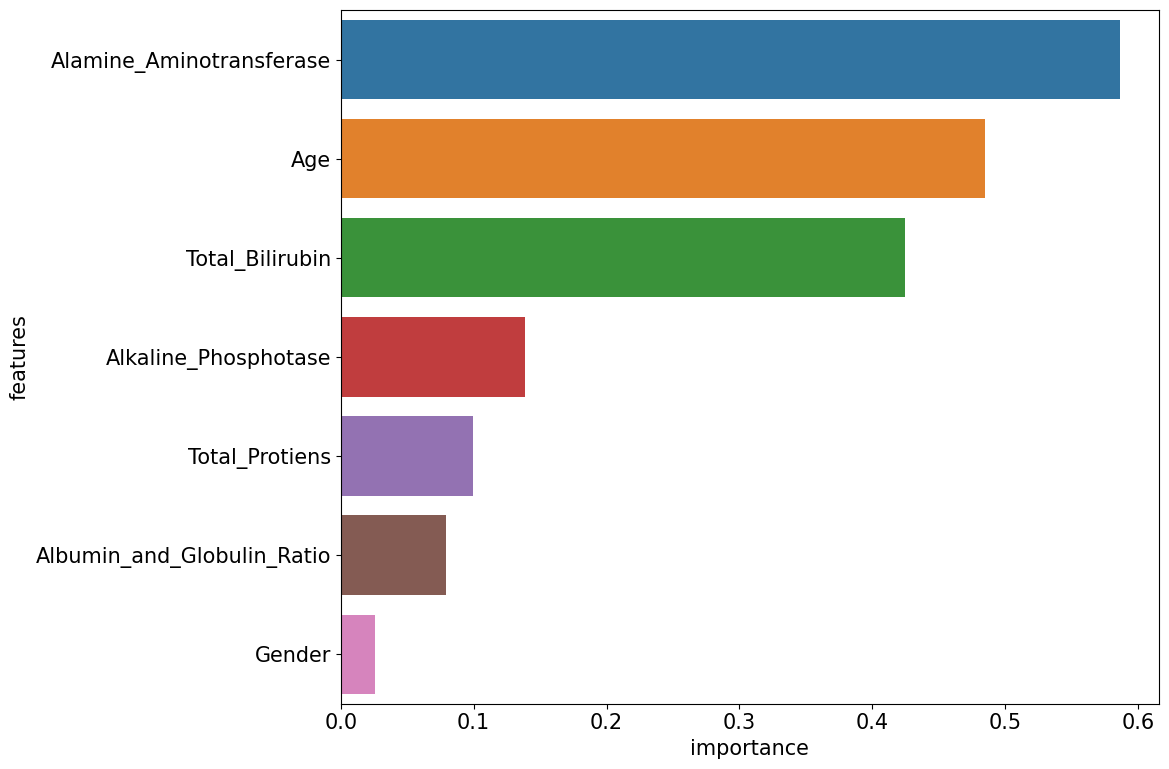

In [79]:
# plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=[12,8])
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = xs.columns
feature_importance_df['importance'] = np.abs(lr_model.coef_[0])
feature_importance_df.sort_values('importance',ascending=False,inplace=True)
sns.barplot(x='importance',y='features',data=feature_importance_df)


plt.rc('font',size=17)
plt.tight_layout()
# plt.xlabel('models')
plt.savefig("images/feature_importance.png",facecolor='white', transparent=False,dpi=150)
plt.show()

# Conclusion
- Scaling data has limited influence to the model performance for this dataset.
- After testing 7 machine learning model I observed LogisticRegression is providing best accuracy score.


- will do model optimization later.

# Acknowledgements

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

2. Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, â€œA Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysisâ€, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012.

3. 2. Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, â€œA Critical Study of Selected Classification Algorithms for Liver Disease Diagnosisâ€, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.